## 实例5：演示session使用

In [1]:
import tensorflow as tf
hello = tf.constant("Hello, Tensorflow!")
sess = tf.Session()
print(sess.run(hello))
sess.close()

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


b'Hello, Tensorflow!'


## 实例6：演示with session使用

In [2]:
a = tf.constant(3)
b = tf.constant(4)
with tf.Session() as sess:
    print("相加: %i" % sess.run(a+b))
    print("相乘: %i" % sess.run(a*b))

相加: 7
相乘: 12


## 实例7：演示feed_dict注入placeholder

In [3]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a, b)
mul = tf.multiply(a, b)
with tf.Session() as sess:
    print("相加: %i" % sess.run(add, feed_dict={a:3, b:4}))
    print("相乘: %i" % sess.run(mul, feed_dict={a:3, b:4}))
    print(sess.run([add, mul], feed_dict={a:3, b:4}))

相加: 7
相乘: 12
[7, 12]


# 指定GPU运算

In [4]:
with tf.Session() as sess:
    with tf.device("/gpu:1"):
        print(sess.run(add, feed_dict={a:3,b:4}))

7


In [5]:
with tf.Session() as sess:
    with tf.device("/gpu:0"):
        print(sess.run(add, feed_dict={a:3,b:4}))

7


 # 保存和载入模型

In [6]:
saver = tf.train.Saver()
a = tf.Variable(tf.zeros([1]),  name="a")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(a))
    saver.save(sess, "/save_model.ckpt")

ValueError: No variables to save

## 实例9：保存/载入回归模型

In [7]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x + noise
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.zeros([1]), name = "bias")
z = tf.multiply(X, W) + b

cost = tf.reduce_mean(tf.square(Y - z))
learning_rate = 0.01
optimizer= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 初始化所有变量
init = tf.global_variables_initializer()
# 定义参数
training_epochs = 20
display_step = 20

saver = tf.train.Saver()

plottdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

# 启动session
with tf.Session() as sess:
    sess.run(init)
    plotdata = {"batchsize":[],'loss':[]}
    
    # 向模型输入数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        # 显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print("Epoch:", epoch+1, "cost=", loss, "W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA"):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
                    
    print("FInished!")
    saver.save(sess, "H:/tensorflow_projects/chap4/save_model.ckpt")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch: 1 cost= 2.172019 W= [-0.20349228] b= [0.628392]
FInished!


In [9]:
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2, "H:/tensorflow_projects/chap4/save_model.ckpt")
    print("x=0.2, z=", sess2.run(z, feed_dict={X: 0.2}))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from H:/tensorflow_projects/chap4/save_model.ckpt
x=0.2, z= [0.37047148]


## 实例10：模型的其他保存方法

In [11]:
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
print_tensors_in_checkpoint_file("H:/tensorflow_projects/chap4/save_model.ckpt", None, True)

tensor_name:  bias
[-0.02965496]
tensor_name:  weight
[2.000632]


In [14]:
W = tf.Variable(1.0, name="weight")
b = tf.Variable(2.0, name="bias")

# 放入一个字典
saver = tf.train.Saver({'weight':b,'bias':W})

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    saver.save(sess, "H:/tensorflow_projects/chap4/linear_model.ckpt")
    
print_tensors_in_checkpoint_file("H:/tensorflow_projects/chap4/linear_model.ckpt", None, True)

tensor_name:  bias
1.0
tensor_name:  weight
2.0


## 实例11：保存checkpoint
### 为模型制定checkpoint文件，制定生成checkpoint文件个数

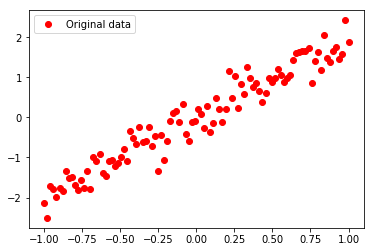

Epoch: 1 cost= 0.41451675 W= [1.0897253] b= [0.2466889]
Epoch: 3 cost= 0.120047785 W= [1.7132107] b= [0.07925816]
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Epoch: 5 cost= 0.09424164 W= [1.882238] b= [0.01560348]
Epoch: 7 cost= 0.09204156 W= [1.9260752] b= [-0.00119855]
Epoch: 9 cost= 0.091777176 W= [1.9374114] b= [-0.00554837]
Epoch: 11 cost= 0.09172919 W= [1.9403435] b= [-0.00667356]
Epoch: 13 cost= 0.09171815 W= [1.9411014] b= [-0.00696438]
Epoch: 15 cost= 0.09171537 W= [1.9412975] b= [-0.00703963]
Epoch: 17 cost= 0.091714665 W= [1.9413482] b= [-0.00705903]
Epoch: 19 cost= 0.09171448 W= [1.9413618] b= [-0.00706426]
FInished!
cost= 0.09171446 W= [1.9413638] b= [-0.00706508]


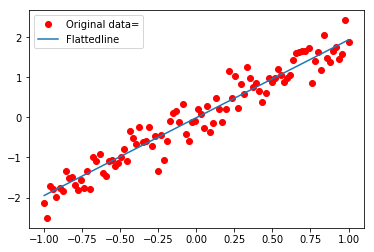

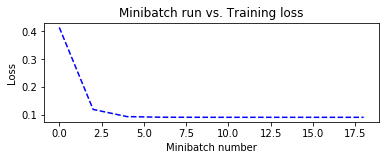

INFO:tensorflow:Restoring parameters from H:/tensorflow_projects/chap4/linearmodel.ckpt-18
x=0.2, z= [0.38120812]


In [16]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

# 定义生成可视化函数
plottdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]


# 生成模拟数据
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x + noise


# 图像显示
plt.plot(train_X, train_Y, 'ro', label = 'Original data')
plt.legend()
plt.show()

# 重置图
tf.reset_default_graph()

# 创建模型
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型参数
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.zeros([1]), name = "bias")
# 前向结构
z = tf.multiply(X, W) + b

# 反向优化
cost = tf.reduce_mean(tf.square(Y - z))
learning_rate = 0.01
optimizer= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 初始化所有变量
init = tf.global_variables_initializer()
# 定义参数
training_epochs = 20
display_step = 2
saver = tf.train.Saver(max_to_keep=1)

# 启动session
with tf.Session() as sess:
    sess.run(init)
    plotdata = {"batchsize":[],'loss':[]}
    
    # 向模型输入数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        # 显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print("Epoch:", epoch+1, "cost=", loss, "W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA"):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
            saver.save(sess, "H:/tensorflow_projects/chap4/linearmodel.ckpt", global_step=epoch)
                    
    print("FInished!")
    
# 可视化
    print("cost=", sess.run(cost, feed_dict={X:train_X, Y:train_Y}), "W=", sess.run(W),"b=", sess.run(b))
    plt.plot(train_X, train_Y, 'ro', label='Original data=')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Flattedline')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
    plt.show()
    
# 重启一个session，载入checkpoint
load_epoch = 18
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2, "H:/tensorflow_projects/chap4/linearmodel.ckpt-" + str(load_epoch))
    print("x=0.2, z=", sess2.run(z, feed_dict={X:0.2}))